In [1]:
from importlib import reload
import utils; reload(utils)
from utils import *

Using cuDNN version 5105 on context None
Preallocating 2867/4095 Mb (0.700000) on cuda0
Mapped name None to device cuda0: GeForce GTX 650 (0000:01:00.0)
Using Theano backend.


In [2]:
%matplotlib inline
import os, random
from shutil import copytree
# data_path =  '/Volumes/Backups/data/LUNA16/patches/50x50/'
data_path =  '/Volumes/Backups/data/LUNA16/patches/'

In [3]:
theano.config.dnn.conv.precision = 'float32'
print(theano.config.dnn.conv.precision)

float32


In [4]:
#for i in range(5):
#    patches1 = random.choice(os.listdir("/Volumes/Backups/data/LUNA16/patches/patches1/"))
#    patches0 = random.choice(os.listdir("/Volumes/Backups/data/LUNA16/patches/patches0/"))
#    try:
#        copytree(data_path + 'patches1/' + patches1, '/Volumes/Backups/data/LUNA16/patches/sample2/patches1/' + patches1)
#    except FileExistsError:
#        continue
#    try:
#        copytree(data_path + 'patches0/' + patches0, '/Volumes/Backups/data/LUNA16/patches/sample2/patches0/' + patches0)
#    except FileExistsError:
#        continue

In [5]:
import numpy as np
np.set_printoptions(precision=4,linewidth=100)
import pandas as pd

In [6]:
from skimage import color

In [27]:
data_path # /Volumes/Backups/data/LUNA16/patches/224x224/patches1/

'/Volumes/Backups/data/LUNA16/patches/'

## Import data

### Double array aside

In [151]:
x=np.array([[1,2,3],[4,5,6],[7,8,9]])

In [152]:
x

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [155]:
x.flatten().repeat(2).reshape(3,6).repeat(2,axis=0)

array([[1, 1, 2, 2, 3, 3],
       [1, 1, 2, 2, 3, 3],
       [4, 4, 5, 5, 6, 6],
       [4, 4, 5, 5, 6, 6],
       [7, 7, 8, 8, 9, 9],
       [7, 7, 8, 8, 9, 9]])

### Now import data

In [394]:
import glob2
from skimage import color
image_labels = []

# input_path = data_path + "224x224/"
# img_size = 224

input_path = data_path + "100x100/"
img_size = 100

ctr = 0
for filename in (os.listdir(input_path)):
    print(filename)
    for image in  glob2.glob(input_path + filename+'/*'):
        ctr += 1
img_array = np.zeros((ctr,3,2*img_size,2*img_size),dtype=np.float32)
# img_array = np.zeros((ctr,3,50,50),dtype=np.float32)


i=0
nKind = 0
#for filename in glob2.glob(data_path+'sample/*/*'):
for filename in (os.listdir(input_path)):
    print(filename)
    for image_name in  glob2.glob(input_path + filename+'/*'):
#         print(image_name)
        if (filename == 'patches0'):
            image_labels.append(np.int16(0.0))
        else:
            image_labels.append(np.int16(1.0))
        x = load_array(image_name).astype(np.float32)
        img = color.gray2rgb(x.flatten().repeat(2).reshape(img_size,2*img_size).repeat(2,axis=0))
        img_array[i] = np.transpose(img,(2,0,1))
        i += 1
#         print(i)
        if i >= 10000 + nKind:
            nKind = 10000
            break



patches0
patches1
patches0
patches1


In [395]:
img_array = img_array[:11351]

In [396]:
img_array.nbytes

5448480000

In [397]:
img_array.shape

(11351, 3, 200, 200)

In [398]:
img_array[0,0]

array([[   2.1857,    2.1857,    4.9179, ...,  197.625 ,  183.0536,  183.0536],
       [   2.1857,    2.1857,    4.9179, ...,  197.625 ,  183.0536,  183.0536],
       [  13.4786,   13.4786,   14.5714, ...,  195.2571,  179.9571,  179.9571],
       ..., 
       [ 255.    ,  255.    ,  255.    , ...,  150.45  ,  144.075 ,  144.075 ],
       [ 255.    ,  255.    ,  255.    , ...,  151.725 ,  153.7286,  153.7286],
       [ 255.    ,  255.    ,  255.    , ...,  151.725 ,  153.7286,  153.7286]], dtype=float32)

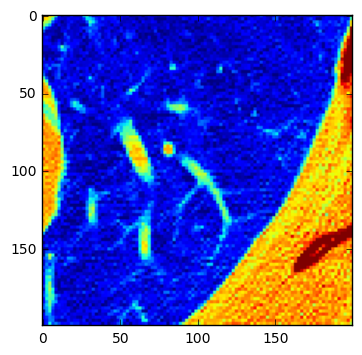

In [399]:
for img in img_array[3001:3002]: #[4350:4351]:
    plt.figure
    plt.imshow(img[0], vmin=0, vmax=255)

In [400]:
img_array[0]

array([[[   2.1857,    2.1857,    4.9179, ...,  197.625 ,  183.0536,  183.0536],
        [   2.1857,    2.1857,    4.9179, ...,  197.625 ,  183.0536,  183.0536],
        [  13.4786,   13.4786,   14.5714, ...,  195.2571,  179.9571,  179.9571],
        ..., 
        [ 255.    ,  255.    ,  255.    , ...,  150.45  ,  144.075 ,  144.075 ],
        [ 255.    ,  255.    ,  255.    , ...,  151.725 ,  153.7286,  153.7286],
        [ 255.    ,  255.    ,  255.    , ...,  151.725 ,  153.7286,  153.7286]],

       [[   2.1857,    2.1857,    4.9179, ...,  197.625 ,  183.0536,  183.0536],
        [   2.1857,    2.1857,    4.9179, ...,  197.625 ,  183.0536,  183.0536],
        [  13.4786,   13.4786,   14.5714, ...,  195.2571,  179.9571,  179.9571],
        ..., 
        [ 255.    ,  255.    ,  255.    , ...,  150.45  ,  144.075 ,  144.075 ],
        [ 255.    ,  255.    ,  255.    , ...,  151.725 ,  153.7286,  153.7286],
        [ 255.    ,  255.    ,  255.    , ...,  151.725 ,  153.7286,  153.7286]

In [401]:
 img_array.shape

(11351, 3, 200, 200)

In [402]:
img.shape

(3, 200, 200)

In [403]:
len(image_labels)

11351

In [404]:
ohe_image_labels = to_categorical(np.array(np.float32(image_labels))).astype(np.float32)

In [405]:
sum(ohe_image_labels) # [0,1], [healthy, sick]

array([ 10000.,   1351.], dtype=float32)

In [406]:
from sklearn.model_selection import train_test_split

In [407]:
trn_labels, val_labels = train_test_split(ohe_image_labels, test_size=0.2, random_state=42)

In [408]:
trn,val = train_test_split(img_array, test_size=0.2, random_state=42,)

In [409]:
trn.shape, val.shape

((9080, 3, 200, 200), (2271, 3, 200, 200))

In [410]:
trn_labels.shape,val_labels.shape

((9080, 2), (2271, 2))

## Set up ResNet50 cnn model

In [411]:
# import resnet50; reload(resnet50)
# from resnet50 import Resnet50

In [412]:
from keras.applications.resnet50 import ResNet50

In [413]:
rn1 = keras.applications.ResNet50(include_top=False, input_shape=(3,200,200))

In [414]:
rn1.output_shape

(None, 2048, 1, 1)

In [415]:
rn1.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_12 (InputLayer)            (None, 3, 200, 200)   0                                            
____________________________________________________________________________________________________
zeropadding2d_11 (ZeroPadding2D) (None, 3, 206, 206)   0           input_12[0][0]                   
____________________________________________________________________________________________________
conv1 (Convolution2D)            (None, 64, 100, 100)  9472        zeropadding2d_11[0][0]           
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 64, 100, 100)  256         conv1[0][0]                      
___________________________________________________________________________________________

In [416]:
val_features = rn1.predict(val)

In [417]:
val_features.shape

(2271, 2048, 1, 1)

In [418]:
%time trn_features = rn1.predict(trn)

CPU times: user 5min 17s, sys: 4.84 s, total: 5min 22s
Wall time: 5min 24s


In [419]:
trn_features.shape

(9080, 2048, 1, 1)

In [420]:
weights_dir = '/Volumes/Backups/data/LUNA16/weights'

In [421]:
save_array(weights_dir + 'val_rn1_conv.bc', val_features)

In [422]:
save_array(weights_dir + 'trn_rn1_conv.bc', trn_features)

## FC net

In [423]:
val_features = load_array(weights_dir + 'val_rn1_conv.bc')

In [424]:
val_features.shape

(2271, 2048, 1, 1)

In [425]:
trn_features = load_array(weights_dir + 'trn_rn1_conv.bc')

In [426]:
trn_features.shape

(9080, 2048, 1, 1)

In [427]:
def get_fc_layers(nf, p):
    return [
#         MaxPooling2D(input_shape=conv_layers[-1].output_shape[1:]),
        BatchNormalization(axis=1, input_shape=rn1.output_shape[1:]),
        Flatten(),
        Dropout(p),
        Dense(nf, activation='relu'),
        BatchNormalization(),
        Dropout(p/2.),
        Dense(nf, activation='relu'),
        BatchNormalization(),
        Dropout(p),
        Dense(2, activation='softmax'),
    ]


In [428]:
lrg_model = Sequential(get_fc_layers(1024, 0.5))

In [429]:
lrg_model.input_shape, lrg_model.output_shape

((None, 2048, 1, 1), (None, 2))

In [430]:
lrg_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
batchnormalization_27 (BatchNorm (None, 2048, 1, 1)    8192        batchnormalization_input_11[0][0]
____________________________________________________________________________________________________
flatten_10 (Flatten)             (None, 2048)          0           batchnormalization_27[0][0]      
____________________________________________________________________________________________________
dropout_28 (Dropout)             (None, 2048)          0           flatten_10[0][0]                 
____________________________________________________________________________________________________
dense_28 (Dense)                 (None, 1024)          2098176     dropout_28[0][0]                 
___________________________________________________________________________________________

In [441]:
lrg_model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [442]:
lrg_model.fit(trn_features, trn_labels, batch_size=8, nb_epoch=1, 
              validation_data=(val_features, val_labels))

Train on 9080 samples, validate on 2271 samples
Epoch 1/1
9080/9080 [==============================] - 19s - loss: 0.2253 - acc: 0.9133 - val_loss: 0.2795 - val_acc: 0.9031

In [ ]:
lrg_model.fit(trn_features, trn_labels, batch_size=8, nb_epoch=3, 
              validation_data=(val_features, val_labels))

Train on 9080 samples, validate on 2271 samples
Epoch 1/3
9080/9080 [==============================] - 19s - loss: 0.2131 - acc: 0.9195 - val_loss: 0.2552 - val_acc: 0.9203

In [ ]:
lrg_model.fit(trn_features, trn_labels, batch_size=8, nb_epoch=3, 
              validation_data=(val_features, val_labels))

Train on 9080 samples, validate on 2271 samples
Epoch 1/3
9080/9080 [==============================] - 19s - loss: 0.1988 - acc: 0.9225 - val_loss: 0.2589 - val_acc: 0.9163

In [ ]:
lrg_model.fit(trn_features, trn_labels, batch_size=8, nb_epoch=3, 
              validation_data=(val_features, val_labels))

In [ ]:
lrg_model.fit(trn_features, trn_labels, batch_size=8, nb_epoch=3, 
              validation_data=(val_features, val_labels))

9080/9080 [==============================] - 19s - loss: 0.2796 - acc: 0.8931 - val_loss: 0.2611 - val_acc: 0.9150

In [ ]:
lrg_model.fit(trn_features, trn_labels, batch_size=8, nb_epoch=3, 
              validation_data=(val_features, val_labels))

Train on 9080 samples, validate on 2271 samples
Epoch 1/3
9080/9080 [==============================] - 19s - loss: 0.2742 - acc: 0.9003 - val_loss: 0.2486 - val_acc: 0.9093

In [ ]:
lrg_model.fit(trn_features, trn_labels, batch_size=8, nb_epoch=3, 
              validation_data=(val_features, val_labels))

In [ ]:
lrg_model.fit(trn_features, trn_labels, batch_size=8, nb_epoch=3, 
              validation_data=(val_features, val_labels))

In [ ]:
lrg_model.fit(trn_features, trn_labels, batch_size=8, nb_epoch=3, 
              validation_data=(val_features, val_labels))

In [ ]:
!du -d 1 -h /Volumes/Backups/data/kaggle2017/unlabeledslices/031b7ec4fe96a3b035a8196264a8c8c3/

In [ ]:
unresArr198 = load_array('/Volumes/Backups/data/unlabeled_patient_collapsed_images-198x3x224x224.bc')

In [ ]:
unlabeledPredictionvgg = lrg_model.predict(unresArr198, batch_size=8, verbose=1)

In [ ]:
#conv_feat = load_array(data_root + 'results/conv_feat.dat')
#conv_val_feat = load_array(data_root + 'results/conv_val_feat.dat')

In [165]:
theano.config.optimizer_verbose = False
print(theano.config.optimizer_verbose)

False


In [167]:
len(img_array)

3358

In [331]:
!git add cnnResnet50.ipynb

In [332]:
!git commit -m "ResNet + final dense layer p=0.25, sample=11351"

[master 4073df3] ResNet + final dense layer p=0.25, sample=4351
 1 file changed, 79 insertions(+), 91 deletions(-)


In [333]:
!git push origin master

X11 forwarding request failed on channel 0
Counting objects: 3, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 1.87 KiB | 0 bytes/s, done.
Total 3 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To git@github.com:ungsur/luna16.git
   2cb086f..4073df3  master -> master


In [12]:
!ls -lh /Volumes/Backups/data/LUNA16/patches/224x224/patches1/ | wc -l

    1352
